# Resampling Datatime Data

Shenyue Jia

## Tasks

- [x] Load the weather data of London from [Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data) and create a datetime index
- [x] Answer some questions related to the data using visualizations and the correct frequency data

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from matplotlib import dates as mdates

In [2]:
# set visualization
fav_style = ('bmh','tableau-colorblind10')
plt.style.use(fav_style)

In [3]:
def format_xdate(ax,freq_y):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator(freq_y)
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Create a monthnformatter that will use numeric month names
    fmt_minor_3m = ""
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig

## Load data and create a datetime index

### Load data

In [4]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


### Convert the `date` column to datetime dtype

In [5]:
# The correct date - properly recognizes dates and does not interpret them as seconds
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

### Set the `date` column as the index

In [6]:
df = df.set_index('date')
df.head(10)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
1979-01-06,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
1979-01-07,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
1979-01-08,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
1979-01-09,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0


### Filter out only the required data

- Keep only data from the year 2000 or later.
- Keep only the following features:
    - `precipitation`
    - `mean_temp`
    - `min_temp`
    - `max_temp`
    - `snow_depth`

In [7]:
# Keep only data from the year 2000 or later & only have the selected features
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


### Impute any missing values

In [8]:
# check the missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

- Interpolate the temperature columns
- Fill the `precipitation` and `snow_depth` columns with 0

In [9]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [10]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [11]:
# check the missing values again
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Answer questions with visualizations

### 1. What month had the most precipitation between 2000 through 2010?

In [12]:
# resample precipitation to month
df_precip = df.loc['2000':'2010', ['precipitation']].copy()
df_precip.head()

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8


In [13]:
df_precip.tail()

,precipitation
date,
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4
2010-12-30,0.0
2010-12-31,0.0


In [14]:
# Resample the precipitation as Monthly frequency.
df_precip_mo = df_precip.resample("MS").sum()
df_precip_mo.sort_values(by='precipitation', ascending=False)

,precipitation
date,
2009-11-01,138.4
2000-10-01,129.8
2002-11-01,128.4
2002-12-01,119.0
2007-07-01,115.2
...,...
2010-06-01,12.4
2006-06-01,11.8
2003-08-01,10.4


**Answer**

**- October, 2000 has the highest precipitation from 2000 to 2010**

**- I was not able to figure out how to plot with minor ticks without minor labels**

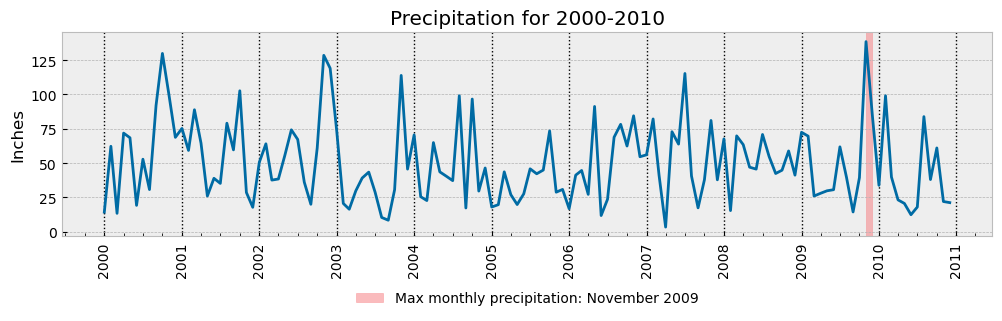

In [21]:
plt.rcParams['figure.figsize'] = (12,3)
fig, ax = plt.subplots()
ax.plot(df_precip_mo.index, df_precip_mo.values)

ax.axvspan('2009-11-01', '2009-11-30', color = '#f7797d', alpha = 0.5, 
           zorder = 0, label = 'Max monthly precipitation: November 2009')

ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')
fig.autofmt_xdate(which='major', rotation=90,ha='center')
ax.legend();
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.4), ncol=3, title=None, frameon=False)
format_xdate(ax,1);

In [22]:
## Save to PNG
FOLDER = "PNG/"
isExist = os.path.exists(FOLDER)
    
if isExist == False:  
      os.makedirs(FOLDER, exist_ok=True)
        
fig.savefig(f'{FOLDER}/precipitation_monthly.png',bbox_inches='tight')

### 2. Which year between 2000-2020 had the coolest average temperature?

In [17]:
# slice avg temperature to 2000-2020
df_temp = df.loc['2000':'2020', ['mean_temp']].copy()
df_temp.head()

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4


In [18]:
# Resample the avg temp as yearly frequency.
df_temp_yr = df_temp.resample("AS").mean()
df_temp_yr.sort_values(by='mean_temp', ascending=True)

,mean_temp
date,
2010-01-01,10.657397
2013-01-01,11.166301
2012-01-01,11.300956
2008-01-01,11.326776
2001-01-01,11.331507
2000-01-01,11.575683
2009-01-01,11.721644
2005-01-01,11.822877
2004-01-01,11.900683


**Answer**

**- 2000 has the lowest yearly average temperature from 2000 to 2020**

**- I was not able to figure out how to plot with minor ticks without minor labels**

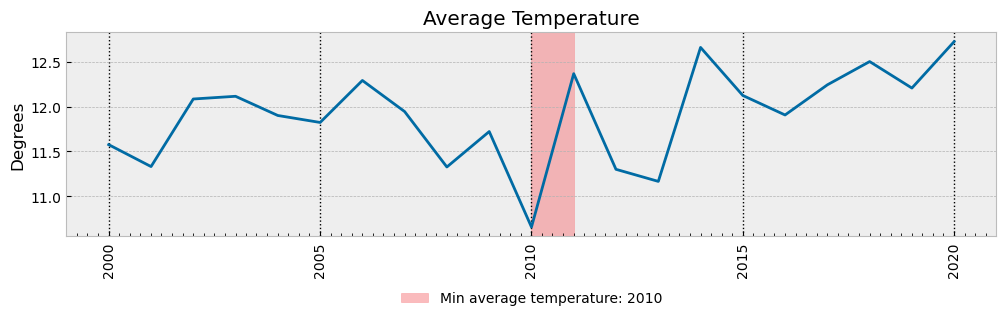

In [23]:
plt.rcParams['figure.figsize'] = (12,3)
fig, ax = plt.subplots()
ax.plot(df_temp_yr.index, df_temp_yr.values)

ax.axvspan('2010-01-01', '2010-12-31', color = '#f7797d', alpha = 0.5, 
           zorder = 0, label = 'Min average temperature: 2010')

ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')
fig.autofmt_xdate(which='major', rotation=90,ha='center')
ax.legend();
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.4), ncol=3, title=None, frameon=False)
format_xdate(ax,5);

In [24]:
## Save to PNG
fig.savefig(f'{FOLDER}/avg_temp_yearly.png',bbox_inches='tight')